In [1]:
import sys
sys.path.append('../')
import mobipy
import matplotlib.pyplot as plt

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('models/simplyq_model.txt', 'models/simplyq_data.dat')

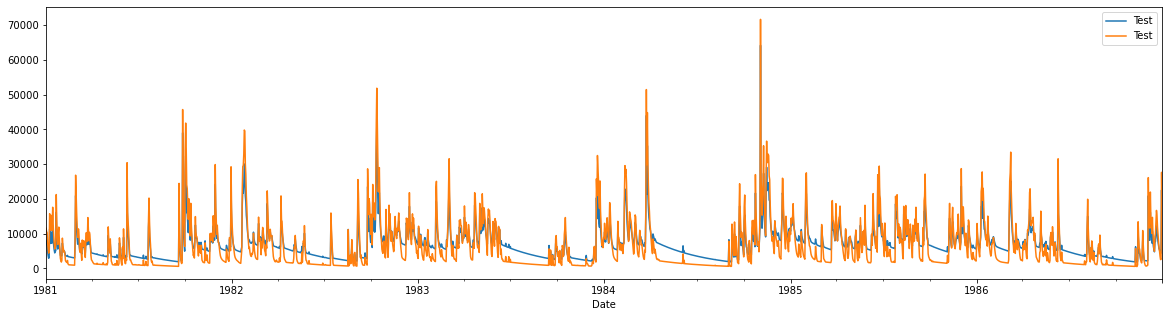

In [3]:
app.run()
before = app.rw.river.water[["Coull"]]     # Read the time series of river.water (volume)
app.sw.bfi[[]] = 0.1                       # Set base flow index to 0.1
app.sw.tc_s[['Arable']] = 5                # Set water time constant for Arable land class to 5
app.run()
after = app.rw.river.water[["Coull"]]      # Read the time series again.

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

before.plot(ax=ax)
after.plot(ax=ax)
ax.legend()